# Laser pulse propagation in optical fiber

To numerically solve the **fractional nonlinear Schrödinger equation (FNLSE)** with a **Caputo fractional derivative in the spatial variable $z$**:

$$
\frac{\partial^\alpha A}{\partial z^\alpha} = -\frac{\alpha_{att}}{2}A + i \frac{\beta_2}{2} \frac{\partial^2 A}{\partial t^2} - i \gamma |A|^2A,
$$

subject to the initial condition

$$
A(0, t) = A_0(t) = A_p \exp\left(-\frac{t^2}{2T_0^2} + i C t^2\right), \quad T_0 = \frac{\text{FWHM}}{2 \sqrt{\ln 2}},
$$

you'll need a numerical scheme that handles:

* **Caputo fractional derivative in $z$** (non-local in nature),
* **Dispersion in $t$** via the second derivative,
* **Nonlinearity in $A$**.

---

## 🔧 Step-by-step Plan:

### 1. **Discretize the time variable $t$**

You can use **spectral methods** (e.g. FFT-based) or **finite differences** for the second derivative in $t$. Spectral methods are typically more efficient and accurate for smooth initial data.

Let:

* $A_j^n \approx A(z_n, t_j)$,
* $t_j = j \Delta t$, $j = -N_t, ..., N_t$,
* $z_n = n \Delta z$, $n = 0, ..., N_z$.

---

### 2. **Caputo fractional derivative in $z$**

The Caputo fractional derivative of order $\alpha \in (0,1)$ is defined as:

$$
\frac{\partial^\alpha A(z, t)}{\partial z^\alpha} = \frac{1}{\Gamma(1-\alpha)} \int_0^z \frac{\partial A(\zeta, t)}{\partial \zeta} \frac{d\zeta}{(z - \zeta)^\alpha}
$$

We approximate it using the **L1 scheme**, a commonly used method for fractional Caputo derivatives:

$$
\frac{\partial^\alpha A(z_n, t)}{\partial z^\alpha} \approx \frac{1}{\Delta z^\alpha \Gamma(2 - \alpha)} \sum_{k=0}^{n-1} b_{k}^{(\alpha)} \left(A_{n-k}^{(t)} - A_{n-k-1}^{(t)} \right),
$$

where:

* $A_n^{(t)}$ is the vector of field values at $z_n$ for all $t$,
* $b_k^{(\alpha)} = (k+1)^{1-\alpha} - k^{1-\alpha}$.

This gives a **history-dependent** recursion.

---

### 3. **Discretize the right-hand side (RHS) of the equation**

You now evaluate:

$$
RHS_n^{(t)} = -\frac{\alpha_{att}}{2} A_n^{(t)} + i \frac{\beta_2}{2} \frac{\partial^2 A_n^{(t)}}{\partial t^2} - i \gamma |A_n^{(t)}|^2 A_n^{(t)}
$$

**a. Second derivative in $t$**:

* Use spectral method (FFT):

  $$
  \mathcal{F} \left[ \frac{\partial^2 A}{\partial t^2} \right] = -\omega^2 \mathcal{F}[A]
  $$

**b. Nonlinear term**:

* Just compute $|A|^2 A$ pointwise in time domain.

---

### 4. **Marching in $z$ with Caputo derivative**

You’ll solve for $A_{n+1}^{(t)}$ at each step using:

$$
\sum_{k=0}^{n} b_{k}^{(\alpha)} (A_{n+1-k}^{(t)} - A_{n-k}^{(t)}) = \Delta z^\alpha \Gamma(2 - \alpha) \cdot RHS_{n+1}^{(t)}
$$

This is an **implicit scheme**, but often simplified using a **predictor-corrector approach**:

---

### 5. **Predictor-Corrector Scheme (Lubich-type)**

1. **Predictor**: estimate $A_{n+1}^{(t)}$ using an explicit scheme (e.g. Euler):

$$
A_{n+1}^{(t)} = A_0^{(t)} + \frac{1}{\Gamma(\alpha)} \sum_{j=0}^{n} \int_{z_j}^{z_{j+1}} \frac{RHS_j^{(t)}}{(z_{n+1} - \zeta)^{1 - \alpha}} d\zeta
$$

This can be approximated via a **trapezoidal rule**.

2. **Corrector**: use updated $RHS_{n+1}^{(t)}$ to refine $A_{n+1}^{(t)}$.

This procedure is iterative and gives a good balance between stability and efficiency.

---

### 6. **Implementation Strategy (Python/NumPy or MATLAB)**

* Initialize $A_0(t)$.
* For each $z_n$, compute:

  * Spectral second derivative in $t$,
  * Nonlinear term,
  * RHS,
  * Caputo L1 approximation using past values,
  * Solve for $A_{n+1}(t)$ using predictor-corrector.

* For efficiency, implement **memory optimization** or **windowed methods** if $z$ gets large.

---

1 % ready
2 % ready
3 % ready
4 % ready
5 % ready
6 % ready
7 % ready
8 % ready
9 % ready
10 % ready
11 % ready
12 % ready
13 % ready
14 % ready
15 % ready
16 % ready
17 % ready
18 % ready
19 % ready
20 % ready
21 % ready
22 % ready
23 % ready
24 % ready
25 % ready
26 % ready
27 % ready
28 % ready
29 % ready
30 % ready
31 % ready
32 % ready
33 % ready
34 % ready
35 % ready
36 % ready
37 % ready
38 % ready
39 % ready
40 % ready
41 % ready
42 % ready
43 % ready
44 % ready
45 % ready
46 % ready
47 % ready
48 % ready
49 % ready
50 % ready
51 % ready
52 % ready
53 % ready
54 % ready
55 % ready
56 % ready
57 % ready
58 % ready
59 % ready
60 % ready
61 % ready
62 % ready
63 % ready
64 % ready
65 % ready
66 % ready
67 % ready
68 % ready
69 % ready
70 % ready
71 % ready
72 % ready
73 % ready
74 % ready
75 % ready
76 % ready
77 % ready
78 % ready
79 % ready
80 % ready
81 % ready
82 % ready
83 % ready
84 % ready
85 % ready
86 % ready
87 % ready
88 % ready
89 % ready
90 % ready
91 % ready
92 % rea

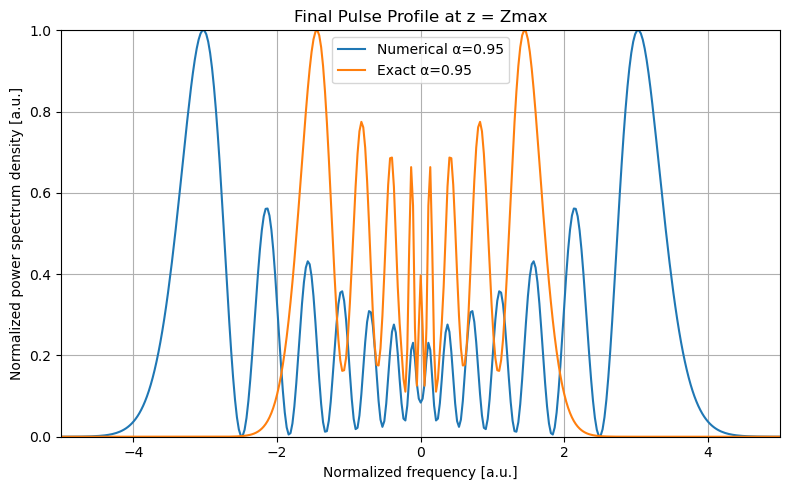

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, ifftshift, fftfreq
from scipy.special import gamma
import warnings
warnings.filterwarnings("error")

# constants
speed_of_light=3*1e8                                        # Speed of light [m/s]

# Defining parameters for the simulation
# Initialize Gaussian pulse parameters (OCTAVIUS-85M-HP from THORLABS) https://www.thorlabs.com/thorproduct.cfm?partnumber=OCTAVIUS-85M-HP
wavelength0=800*1e-9                                        # Pulse central wavelengt [m]
frequency0=speed_of_light/wavelength0                       # Pulse central frequency [Hz] 0.375*1e15 Hz = 0.375 PHz which equals to 800 nm
omega0=2*np.pi*frequency0                                   # Pulse central angular frequency [rad/s]
duration_FWHM=8*1e-15                                       # Pulse duration in FWHM [s]
duration=duration_FWHM / (2 * np.sqrt(np.log(2)))
repetition_frequency=85*1e6                                 # Pulse repetition frequency [Hz]
average_power=600*1e-3                                      # Pulse average power [W]
pulse_energy=average_power/repetition_frequency             # Pulse energy [J]
peak_power=pulse_energy/duration_FWHM                       # Pulse peak power [W]
amplitude=np.sqrt(peak_power)                               # Electrical field strength amplitude in units of sqrt(W)
N=2**10 #2**10                                              # Number of points                                                    
Time_window=100e-15                                         # Time window [s]
chirp = 0                                                   # Chirp parameter
alpha = 0.95                                                # Fractional order

# Defining the parameters of the fiber
nsteps=2**11 #2**11                                                                   # Number of steps we divide the fiber into
effective_mode_diameter=5e-6                                                          # Effective mode diameter [m] from https://www.thorlabs.com/thorproduct.cfm?partnumber=780HP
effective_mode_area=(np.pi/4)*effective_mode_diameter**2                              # Effective mode area [m^2]
nonlinear_refractive_index=2.7*1e-20                                                  # Nonlinear refractive index [m^2/W] of fused silica @ 800 nm from https://opg.optica.org/oe/fulltext.cfm?uri=oe-27-26-37940&id=424534
gammaconstant=(2*np.pi*nonlinear_refractive_index)/(wavelength0*effective_mode_area)  # Nonlinear parameter [1/(W*m)]
beta2=0                                                                               # Convert GVD to s^2/m so everything is in SI units of fused silica @ 800nm
alpha_dB_per_m=0 

# Some useful parameters
nonlinear_length=1/(gammaconstant*peak_power)

# Prppagation distance
z = 4.5 * np.pi * nonlinear_length                          # Propagation distance [m]

# Time and frequency grid
t = np.linspace(-Time_window/2,Time_window/2,N)                                                                                  
dt = abs(t[1] - t[0])                                   
f = fftshift(fftfreq(N,d=dt))
omega = f * 2 * np.pi 

# spatial step
dz = z / nsteps 

def getPower(amplitude):
    return np.abs(amplitude) ** 2

def chirpedGaussianPulseTime(time,amplitude,duration,chirp):
    return amplitude*np.exp(-((1+1j*chirp)/2)*(time/duration)**2)

def getSpectrumFromPulse(time,pulse_amplitude):
    dt=time[1]-time[0]
    spectrum_amplitude=fftshift(fft(pulse_amplitude))*dt # Take FFT and do shift
    return spectrum_amplitude

# ----- Initial Condition -----
A0_t = chirpedGaussianPulseTime(t,amplitude,duration,chirp)

# ----- Allocate arrays -----
A = np.zeros((nsteps + 1, N), dtype=np.complex128)
A[0, :] = A0_t

# Caputo weights (L1 scheme)
b = np.zeros(nsteps)
for k in range(nsteps):
    b[k] = (k + 1) ** (1 - alpha) - k ** (1 - alpha)
prefactor = dz ** (-alpha) / gamma(2 - alpha)

# ----- Time evolution -----
for n in range(nsteps):
    # Compute FFT of current field
    A_t = A[n, :]
    A_w = fftshift(fft(ifftshift(A_t)))

    A_w = fft(A_t)
    
    # Dispersion term (spectral)
    D_t = fftshift(ifft(ifftshift(-0.5j * beta2 * omega**2 * A_w)))

    # Nonlinear term
    N_t = -1j * gammaconstant * np.abs(A_t)**2 * A_t

    # Attenuation
    L_t = -0.5 * alpha_dB_per_m * A_t

    # Total RHS
    RHS = L_t + D_t + N_t

    # Caputo derivative approximation (L1 scheme)
    frac_sum = np.zeros_like(A_t)
    for k in range(n + 1):
        frac_sum += b[k] * (A[n - k + 1, :] - A[n - k, :])
    
    # Update field using explicit Euler (first step of predictor-corrector)
    A[n + 1, :] = A[n, :] + dz ** alpha * RHS / gamma(1 + alpha)

    delta = int(round(n*100/nsteps)) - int(round((n-1)*100/nsteps))
    if delta == 1:
        print(str(int(round(n*100/nsteps))) + " % ready")

def mittag_leffler_series(alpha, z, K=160):
    result = 0
    for k in range(K):
        result += z**k / gamma(alpha * k + 1)
    return result

def mittag_leffler_array(alpha, arg_array):
    return np.array([mittag_leffler_series(alpha, element) for element in arg_array], dtype=np.complex128)

A_final = A[-1, :]
A_spectrum_final = getSpectrumFromPulse(t,A_final)
A_final_power = getPower(A_final)
A_spectrum_final_power = getPower(A_spectrum_final)

arg_exact = 1j * gammaconstant * getPower(A0_t) * z ** alpha
A_exact = A0_t * mittag_leffler_array(alpha, arg_exact)
A_exact_spectrum = getSpectrumFromPulse(t,A_exact)
A_exact_spectrum_power = getPower(A_exact_spectrum)

# ----- Plot final solution at z = Zmax -----
plt.figure(figsize=(8, 5))
#plt.plot(t, A_final_power / np.max(A_final_power), label='|A(z=Zmax, t)|²')
plt.plot(omega/omega0, A_spectrum_final_power / np.max(A_spectrum_final_power), label=f"Numerical α={alpha}")
plt.plot(omega/omega0, A_exact_spectrum_power / np.max(A_exact_spectrum_power), label=f"Exact α={alpha}")
#plt.xlabel('Time of [s]')
plt.xlabel('Normalized frequency [a.u.]')
plt.ylabel('Normalized power spectrum density [a.u.]')
plt.title('Final Pulse Profile at z = Zmax')
plt.axis([-5,5,0,1])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()